In [1]:
import pandas as pd
df=pd.read_excel("Online Retail.xlsx", encoding='utf-8')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df1=df[pd.isnull(df['CustomerID'])]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [6]:
df=df.drop(df.index[pd.isnull(df['CustomerID'])])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
dfn=df
index_delete=[]
for index,row in dfn.iterrows():
    if(row['Quantity']<0) & (row['Description']!='Discount'):
        if df[(row['Quantity']==-df['Quantity'])& (df['InvoiceDate']<row['InvoiceDate'])& (df['Description']==row['Description'])
         &(df['CustomerID']==row['CustomerID'])].shape[0]==0:
            index_delete.append(index)

In [9]:
df=df.drop(index_delete)

In [10]:
df.shape

(400909, 8)

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(395698, 8)

In [13]:
###########customer and products###########################

weekends=['Sunday','Saturday','Friday']
custID=df['CustomerID'].unique()
weekend=[]
weekdays=[]
non=[]
for i in custID:
    day=df.loc[df['CustomerID']==i]['InvoiceDate'].dt.day_name().unique()
    if(all(x in weekends for x in day)):
        weekend.append(i)
    elif(all(x not in weekends for x in day)):
        weekdays.append(i)
    else:
        non.append(i)

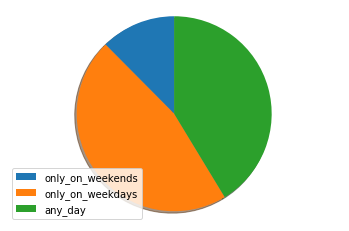

In [14]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'only_on_weekends','only_on_weekdays','any_day'
sizes = [len(weekend),len(weekdays),len(non)]
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
df[df['Quantity']>1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
16435,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom
534952,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [17]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
import numpy as np

(df['InvoiceDate'].max()-pd.Timestamp.now())/np.timedelta64(1,'D')

-3274.9362844731945

In [20]:
#####################recency###########################
data=df['CustomerID'].unique()
dfrfm=pd.DataFrame(data,columns=['custid'])
dfrfm

,custid
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
...,...
4334,13436.0
4335,15520.0
4336,13298.0
4337,14569.0


In [21]:
rvalue=[]
fvalue=[]
for i in dfrfm['custid']:
    r=(pd.Timestamp.now()-df[df['CustomerID']==i]['InvoiceDate'].max())/np.timedelta64(1,'D')
    rvalue.append(r)
    
dfrfm['rvalue']=rvalue

In [22]:
dfrfm

,custid,rvalue
0,17850.0,3576.861285
1,13047.0,3305.964063
2,12583.0,3277.132813
3,13748.0,3370.064757
4,15100.0,3608.030035
...,...,...
4334,13436.0,3276.031476
4335,15520.0,3276.014115
4336,13298.0,3275.921754
4337,14569.0,3275.847448


In [23]:
dfrfm.min()

custid    12346.000000
rvalue     3274.936325
dtype: float64

In [24]:
dfrfm['rvalue'].min()

3274.9363245385184

In [25]:
dfrfm['rvalue'].max()

3648.0592016230557

In [26]:
r_labels = range(5, 0, -1)
r_groups = pd.qcut(dfrfm['rvalue'], q=5, labels=r_labels)
dfrfm = dfrfm.assign(R = r_groups.values)
dfrfm

,custid,rvalue,R
0,17850.0,3576.861285,1
1,13047.0,3305.964063,4
2,12583.0,3277.132813,5
3,13748.0,3370.064757,2
4,15100.0,3608.030035,1
...,...,...,...
4334,13436.0,3276.031476,5
4335,15520.0,3276.014115,5
4336,13298.0,3275.921754,5
4337,14569.0,3275.847448,5


In [27]:
#############frequency##################
fvalue=[]
for i in dfrfm['custid']:
    f=df[df['CustomerID']==i].shape[0]
    fvalue.append(f)
dfrfm['freq']=fvalue

In [28]:
dfrfm

,custid,rvalue,R,freq
0,17850.0,3576.861285,1,300
1,13047.0,3305.964063,4,175
2,12583.0,3277.132813,5,248
3,13748.0,3370.064757,2,28
4,15100.0,3608.030035,1,3
...,...,...,...,...
4334,13436.0,3276.031476,5,12
4335,15520.0,3276.014115,5,18
4336,13298.0,3275.921754,5,2
4337,14569.0,3275.847448,5,12


In [29]:
f_labels = range(1, 6)
f_groups = pd.qcut(dfrfm['freq'], q=5, labels=f_labels)
dfrfm = dfrfm.assign(F = f_groups.values)
dfrfm

,custid,rvalue,R,freq,F
0,17850.0,3576.861285,1,300,5
1,13047.0,3305.964063,4,175,5
2,12583.0,3277.132813,5,248,5
3,13748.0,3370.064757,2,28,2
4,15100.0,3608.030035,1,3,1
...,...,...,...,...,...
4334,13436.0,3276.031476,5,12,1
4335,15520.0,3276.014115,5,18,2
4336,13298.0,3275.921754,5,2,1
4337,14569.0,3275.847448,5,12,1


In [30]:
df['cost']=df['Quantity']*df['UnitPrice']

In [31]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [32]:
mvalue=[]
for i in dfrfm['custid']:
    m=df[df['CustomerID']==i]['cost'].sum()
    mvalue.append(m)
dfrfm['mvalue']=mvalue
dfrfm

,custid,rvalue,R,freq,F,mvalue
0,17850.0,3576.861285,1,300,5,5344.35
1,13047.0,3305.964063,4,175,5,3196.09
2,12583.0,3277.132813,5,248,5,7220.54
3,13748.0,3370.064757,2,28,2,948.25
4,15100.0,3608.030035,1,3,1,876.00
...,...,...,...,...,...,...
4334,13436.0,3276.031476,5,12,1,196.89
4335,15520.0,3276.014115,5,18,2,343.50
4336,13298.0,3275.921754,5,2,1,360.00
4337,14569.0,3275.847448,5,12,1,227.39


In [33]:
m_labels = range(1, 6)
m_groups = pd.qcut(dfrfm['mvalue'], q=5, labels=m_labels)
dfrfm = dfrfm.assign(M = m_groups.values)
dfrfm

,custid,rvalue,R,freq,F,mvalue,M
0,17850.0,3576.861285,1,300,5,5344.35,5
1,13047.0,3305.964063,4,175,5,3196.09,5
2,12583.0,3277.132813,5,248,5,7220.54,5
3,13748.0,3370.064757,2,28,2,948.25,4
4,15100.0,3608.030035,1,3,1,876.00,3
...,...,...,...,...,...,...,...
4334,13436.0,3276.031476,5,12,1,196.89,1
4335,15520.0,3276.014115,5,18,2,343.50,2
4336,13298.0,3275.921754,5,2,1,360.00,2
4337,14569.0,3275.847448,5,12,1,227.39,1


In [34]:
df2=dfrfm[['R','F','M']]
df2

,R,F,M
0,1,5,5
1,4,5,5
2,5,5,5
3,2,2,4
4,1,1,3
...,...,...,...
4334,5,1,1
4335,5,2,2
4336,5,1,2
4337,5,1,1


In [138]:
cluster=[]
for index,row in df2.iterrows():
    if((row.R>=2) & (row.F>=3) & (row.M<=3)):
        cluster.append("Gold")
    elif((row.R>=4) & (row.F>=4) & (row.M==5)):
        cluster.append("Platinum")
    elif((row.R<=3) & (row.F>=3) & (row.M>=4)):
        cluster.append("Old_Platinum")
    elif((row.R>=3) & (row.F<=2) & (row.M<=3)):
        cluster.append("Newbie")
    elif((row.R>=3) & (row.F<=3) & (row.M>=3)):
        cluster.append("Silver")
    elif((row.R<=3) & (row.F<=3) & (row.M>=3)):
        cluster.append("Chance")
    else:
        cluster.append("Master")
    
df2['Cluster']=cluster
df2


,R,F,M,cluster,h-cluster,h_cluster,Cluster
4,1,1,3,1,1,1,Chance
5,4,4,5,3,2,3,Platinum
6,5,5,5,3,2,3,Platinum
7,4,4,5,3,2,3,Platinum
8,5,5,5,3,2,3,Platinum
...,...,...,...,...,...,...,...
4334,5,1,1,2,0,0,Newbie
4335,5,2,2,2,0,0,Newbie
4336,5,1,2,2,0,0,Newbie
4337,5,1,1,2,0,0,Newbie


Master          1291
Gold             820
Newbie           612
Old_Platinum     598
Platinum         590
Chance           262
Silver           162
Name: Cluster, dtype: int64


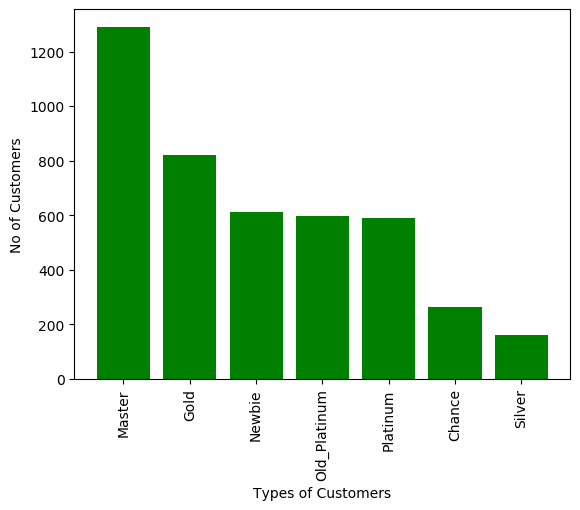

In [139]:
days = df2['Cluster'].value_counts()
print(days)
plt.bar(days.index,days.values,data = df, color = 'green')
plt.xlabel("Types of Customers")
plt.ylabel("No of Customers")
plt.xticks(rotation=90)
plt.show()

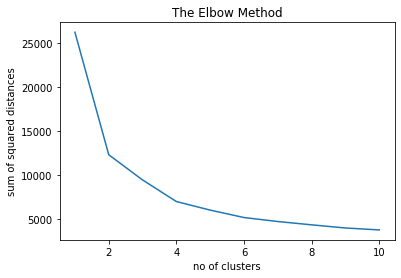

In [54]:
df2=dfrfm[['R','F','M']]
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('sum of squared distances')
plt.show()

In [92]:

kmeans = KMeans(n_clusters= 4, init='k-means++', random_state=0)
kmeans.fit(df2)
pred = kmeans.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    1292
1    1153
2     975
0     915
Name: cluster, dtype: int64

In [93]:
frame['cluster'].value_counts()[3]



1292

In [86]:

import plotly.graph_objects as go

PLOT = go.Figure()
for C in list(df2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df2[df2.cluster == C]['R'],
                                y = df2[df2.cluster == C]['F'],
                                z = df2[df2.cluster == C]['M'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'R', titlefont_color = 'black'),
                                yaxis=dict(title = 'F', titlefont_color = 'black'),
                                zaxis=dict(title = 'M', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

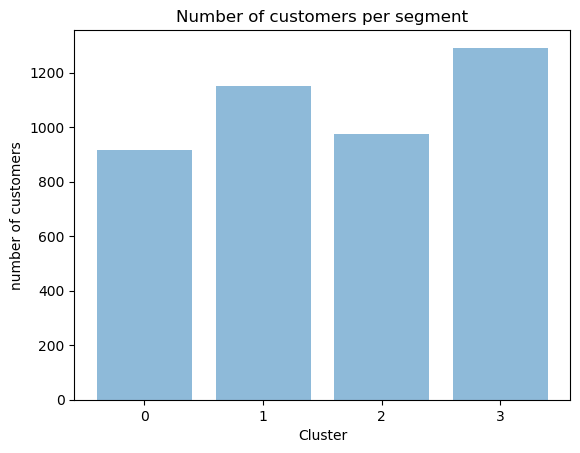

In [97]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

labels = ('0','1','2','3')
y_pos = np.arange(len(labels))
performance = [frame['cluster'].value_counts()[0],frame['cluster'].value_counts()[1],frame['cluster'].value_counts()[2],frame['cluster'].value_counts()[3]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('number of customers')
plt.xlabel('Cluster')
plt.title('Number of customers per segment')

plt.show()

In [106]:
R_avg=[]
F_avg=[]
M_avg=[]
rfm_avg=[]
r=[0,1,2,3]
for i in r:
    d=df2[df2['cluster']==i]
    m=d.mean()
    R_avg.append(m['R'])
    F_avg.append(m['F'])
    M_avg.append(m['M'])
    rfm_avg.append((m['R']+m['F']+m['M'])/3)
print(R_avg,F_avg,M_avg,rfm_avg)

[2.1868852459016392, 1.3894189071986123, 3.8666666666666667, 4.359133126934984] [3.5453551912568306, 1.5975715524718126, 2.0574358974358975, 4.507739938080495] [3.5879781420765027, 1.6929748482220295, 2.0164102564102566, 4.4868421052631575] [3.106739526411658, 1.5599884359641514, 2.646837606837607, 4.451238390092879]


Text(0, 0.5, 'Scores')

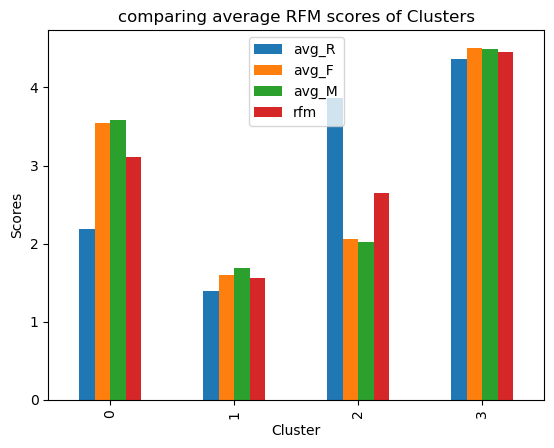

In [107]:
plotdata = pd.DataFrame({
    "avg_R":R_avg,"avg_F":F_avg,"avg_M":M_avg,"rfm":rfm_avg
    }, 
    index=['0','1','2','3']
)
plotdata.plot(kind="bar")
plt.title("comparing average RFM scores of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Scores")

In [87]:
#########################agglomerative


import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
p=cluster.fit_predict(df2)
frame = pd.DataFrame(df2)
frame['h_cluster'] = p
frame['h_cluster'].value_counts()


3    1292
1    1153
0     975
2     915
Name: h_cluster, dtype: int64

In [88]:
for C in list(df2.h_cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df2[df2.h_cluster == C]['R'],
                                y = df2[df2.h_cluster == C]['F'],
                                z = df2[df2.h_cluster == C]['M'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'R', titlefont_color = 'black'),
                                yaxis=dict(title = 'F', titlefont_color = 'black'),
                                zaxis=dict(title = 'M', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

Text(0, 0.5, 'Scores')

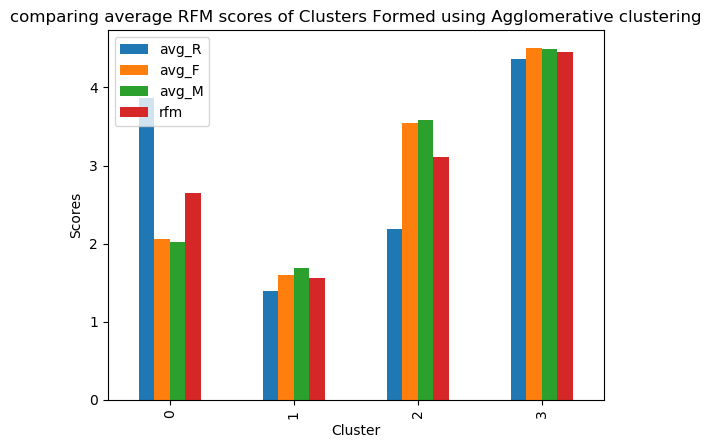

In [137]:
R1_avg=[]
F1_avg=[]
M1_avg=[]
rfm1_avg=[]
r1=[0,1,2,3]
for i in r1:
    d1=df2[df2['h_cluster']==i]
    m=d1.mean()
    R1_avg.append(m['R'])
    F1_avg.append(m['F'])
    M1_avg.append(m['M'])
    rfm1_avg.append((m['R']+m['F']+m['M'])/3)
plotdata = pd.DataFrame({
    "avg_R":R1_avg,"avg_F":F1_avg,"avg_M":M1_avg,"rfm":rfm1_avg
    }, 
    index=['0','1','2','3']
)
plotdata.plot(kind="bar")
plt.title("comparing average RFM scores of Clusters Formed using Agglomerative clustering")
plt.xlabel("Cluster")
plt.ylabel("Scores")
